# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


## 1. Polynomial Regression (Non-linear regression)



### Use case
Develop a polynomial regression-based machine learning model to predict housing prices in Canada, using 20 years of historical data that includes socioeconomic and demographic characteristics such as population, median income, and mortgage interest rates.

In [117]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 
df = pd.read_csv("melted_data_1120.csv")
print(df.head())

         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price  
0    One_storey  207700  
1    One_storey  208400  
2    One_storey  209200  
3    One_storey  210100  
4    One_storey  210600  


### Calculate correlation

Correlation matrix:
               Median income  Population  Mortgage Rate  Interest Rate  \
Median income       1.000000    0.928233      -0.726340      -0.582947   
Population          0.928233    1.000000      -0.813530      -0.612314   
Mortgage Rate      -0.726340   -0.813530       1.000000       0.841515   
Interest Rate      -0.582947   -0.612314       0.841515       1.000000   
price               0.703709    0.780786      -0.579921      -0.414241   

                  price  
Median income  0.703709  
Population     0.780786  
Mortgage Rate -0.579921  
Interest Rate -0.414241  
price          1.000000  


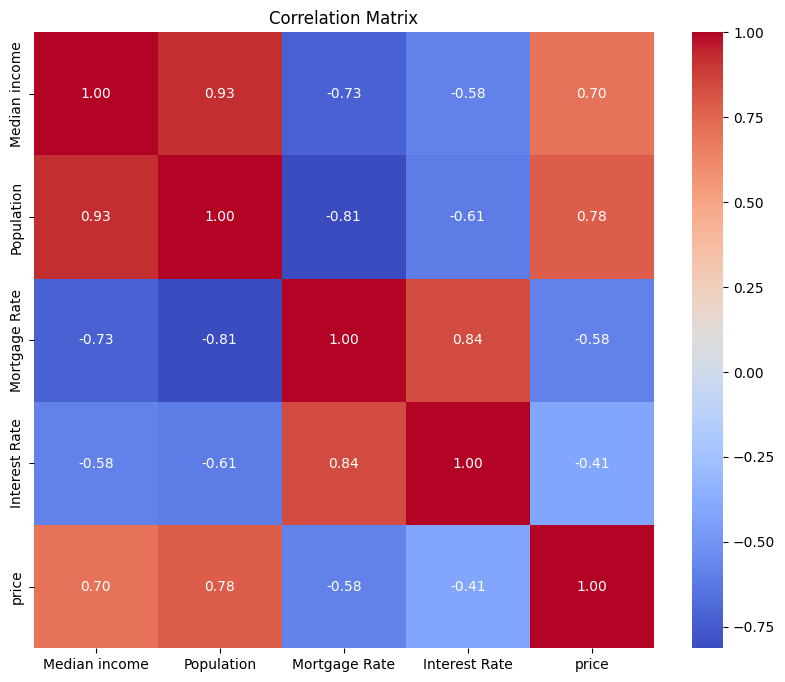

In [118]:
import pandas as pd
import numpy as np

# Since `Date` and `property_type` are non-numeric, we exclude them from the correlation
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# If you want to visualize it:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Trainning the Model

In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Independent variables (Population, Median Income) and target variable (price)
X = df[['Population', 'Median income']].values
y = df['price'].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions
y_pred = model.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Summary using statsmodels
# Add a constant to the model for the intercept
X_poly_train_sm = sm.add_constant(X_poly_train)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_poly_train_sm).fit()

# Print the summary
print(model_sm.summary())

Mean Squared Error: 8316734944.004949
R-squared: 0.62429739262656
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     382.8
Date:                Thu, 28 Nov 2024   Prob (F-statistic):          8.43e-187
Time:                        00:08:19   Log-Likelihood:                -10744.
No. Observations:                 836   AIC:                         2.150e+04
Df Residuals:                     831   BIC:                         2.152e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

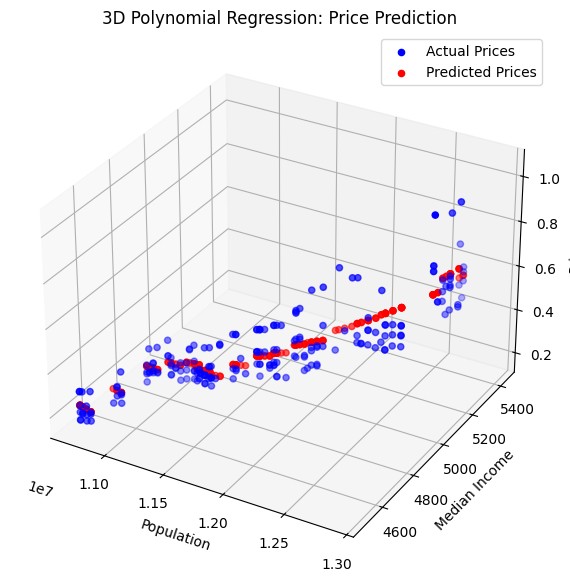

In [120]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual Prices')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Predicted Prices')

ax.set_xlabel('Population')
ax.set_ylabel('Median Income')
ax.set_zlabel('Price')
plt.title('3D Polynomial Regression: Price Prediction')
plt.legend()
plt.show()


Implementing Non-Linear Regression and its Relevance to Predicting Housing Prices in Canada
Predicting housing prices is a complex task due to the intricate relationships between various factors such as socioeconomic and demographic characteristics, as well as economic indicators. A polynomial regression-based machine learning model, a form of non-linear regression, is highly suitable for capturing these relationships, particularly when linear models fail to represent the complexity inherent in housing price trends.

Implementing Non-Linear Regression
Non-linear regression, specifically polynomial regression, extends the capabilities of traditional linear regression by introducing polynomial terms. Instead of modeling the relationship as 𝑦 = 𝛽 0 + 𝛽 1 𝑥 y=β 0 ​ +β 1 ​ x, polynomial regression models it as 𝑦 = 𝛽0 + 𝛽1𝑥 + 𝛽2𝑥2 + … + 𝛽𝑛𝑥𝑛, where 𝑛 n represents the polynomial degree. This allows the model to fit curves to the data, making it adept at modeling non-linear trends.


Steps to Implement Polynomial Regression
Data Preparation: The first step is to preprocess the historical data, ensuring it is cleaned, scaled, and structured for analysis. Key predictors for housing prices include population, median income, and mortgage interest rates. Feature scaling is essential for improving convergence during model training.
Feature Engineering: Polynomial terms (e.g., 𝑥2,𝑥3x 2,x 3
 ) are created for the independent variables, capturing non-linear relationships. Interactions between variables may also be added to account for more complex dependencies, such as how median income and interest rates jointly influence housing prices.
Model Selection and Training: The degree of the polynomial is a crucial hyperparameter. Too low a degree may underfit the data, while a high degree risks overfitting. Cross-validation techniques are used to identify the optimal degree. Libraries like scikit-learn simplify the process of polynomial regression using its PolynomialFeatures and regression modules.
Model Evaluation: Performance is assessed using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. A well-tuned polynomial regression model should generalize well to unseen data.
Addressing Challenges
While polynomial regression is effective for non-linear patterns, challenges such as multicollinearity (arising from polynomial terms) and overfitting must be managed. Regularization techniques, like Ridge or Lasso regression, can address these issues by penalizing large coefficients.

Relevance to the Term Project
The relevance of polynomial regression to this term project lies in its ability to model the non-linear relationships between housing prices and their predictors. For instance:

Population Growth: Housing prices often exhibit exponential increases in areas with rapid population growth, necessitating a model that can capture such trends.
Interest Rates and Income: The impact of mortgage interest rates on housing prices is often non-linear, as affordability thresholds influence buyer behavior. Similarly, the relationship between median income and housing prices can involve diminishing returns.
By incorporating polynomial regression, the project can provide a more nuanced understanding of housing market dynamics in Canada over the past 20 years. This is critical for both accuracy in predictions and interpretability of results, as policymakers, investors, and stakeholders rely on these insights to make informed decisions.

Advantages and Broader Applications
Implementing polynomial regression demonstrates the project’s ability to handle complex real-world data effectively. Beyond this project, the techniques developed are transferable to other domains, such as predicting sales growth, energy consumption, or healthcare outcomes. The experience gained from fine-tuning the model, interpreting results, and handling challenges like overfitting and multicollinearity will provide valuable skills applicable across various machine learning applications.

Conclusion
Non-linear regression, implemented via polynomial regression, is a crucial component of this term project on predicting Canadian housing prices. It aligns well with the project's objectives by accurately capturing the non-linear relationships between predictors and outcomes. This approach ensures meaningful, actionable insights, making it a vital tool for tackling real-world challenges in data-driven decision-making.

 ### 2.  Logistic Regression

### Use Case
Predicting Price Categories (low, medium, high) of Properties in Canada Based on Macroeconomic Factors like 'Median income', 'Population', 'Mortgage Rate', 'Interest Rate' using a logistic regression supervised learning model that analyzes 20 years of economic and real estate market data.





Logistic Regression and Its Relevance to Predicting Property Price Categories in Canada
Logistic regression is a crucial tool for addressing classification problems, making it particularly relevant to this term project, which focuses on predicting property price categories (low, medium, high) in Canada based on macroeconomic factors. By analyzing 20 years of data, including variables such as median income, population, mortgage rates, and interest rates, logistic regression offers a robust framework to uncover patterns in the housing market and provide actionable insights.

A Tool for Classification
The primary objective of this project is to classify properties into distinct categories, making logistic regression an inherently relevant choice. Unlike linear regression, which predicts continuous values, logistic regression is designed to handle categorical outcomes. By applying a multinomial logistic regression model, the probabilities for multiple classes—low, medium, and high—are calculated. This allows the model to assign each property to the category it is most likely to belong to, based on the underlying macroeconomic data.

This classification ability aligns with the project’s goal of providing stakeholders, such as real estate professionals, financial analysts, and policymakers, with actionable insights. For example, it enables stakeholders to identify which demographic and economic factors have the most influence on properties falling into higher or lower price tiers, a critical aspect for market segmentation and policy development.


Interpretable Insights
One of the strongest advantages of logistic regression is its interpretability, which is highly beneficial for understanding the factors driving housing prices. Unlike complex machine learning models like neural networks or ensemble methods, logistic regression provides clear and interpretable coefficients. These coefficients indicate the direction and strength of the relationship between each independent variable (e.g., median income or interest rates) and the likelihood of a property being categorized into a specific price segment. For example, a positive coefficient for median income would suggest that higher incomes are associated with higher property price categories. This interpretability ensures that the results can be easily communicated to stakeholders, including policymakers, real estate analysts, and financial institutions.

Handling Macroeconomic Data
Logistic regression’s relevance also lies in its ability to work effectively with structured datasets like those used in this project. Macroeconomic data often exhibit linear or slightly non-linear relationships, which logistic regression can handle efficiently. Moreover, its statistical foundation makes it well-suited for analyzing economic trends, as it accounts for how individual factors interact to influence categorical outcomes. For instance, the model can analyze how population growth in specific regions impacts housing affordability, which is a critical concern in the Canadian housing market.

Efficiency and Scalability
Another reason for the relevance of logistic regression is its computational efficiency. Given that this term project involves 20 years of historical data, logistic regression provides a scalable solution for analyzing large datasets without requiring extensive computational resources. This efficiency is particularly important for projects that aim to generate results within a limited timeframe while maintaining accuracy and reliability.

Real-World Applicability
Logistic regression is widely used in fields such as economics, finance, and real estate, where understanding categorical outcomes is essential. Its application in this term project bridges the gap between data-driven modeling and real-world insights. For instance, predicting property price categories can inform government housing policies, help financial institutions assess mortgage risks, and guide real estate developers in identifying high-demand areas. By using logistic regression, the project aligns with methodologies already trusted in industry and research, enhancing its practical relevance.

Conclusion
Logistic regression is a highly relevant model for this term project due to its focus on classification, interpretability, and efficiency. By leveraging 20 years of macroeconomic data, it provides a powerful framework for understanding the factors influencing property price categories in Canada. Its applicability to real-world problems ensures that the insights generated are not only theoretically sound but also practical for stakeholders in the housing market. This makes logistic regression a foundational tool for achieving the project's goals of uncovering actionable trends in the Canadian real estate sector.








### Prepare the dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("melted_data_1120.csv")

bins = [0, 200000, 210000, 220000, float('inf')]
labels = ['low', 'medium', 'high', 'very_high']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

print(df.head())


         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price price_category  
0    One_storey  207700         medium  
1    One_storey  208400         medium  
2    One_storey  209200         medium  
3    One_storey  210100           high  
4    One_storey  210600           high  


In [122]:
print(df.head())

         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price price_category  
0    One_storey  207700         medium  
1    One_storey  208400         medium  
2    One_storey  209200         medium  
3    One_storey  210100           high  
4    One_storey  210600           high  


In [131]:
print(df.dtypes)


Date                object
Median income      float64
Population         float64
Mortgage Rate      float64
Interest Rate      float64
property_type       object
price                int64
price_category    category
dtype: object


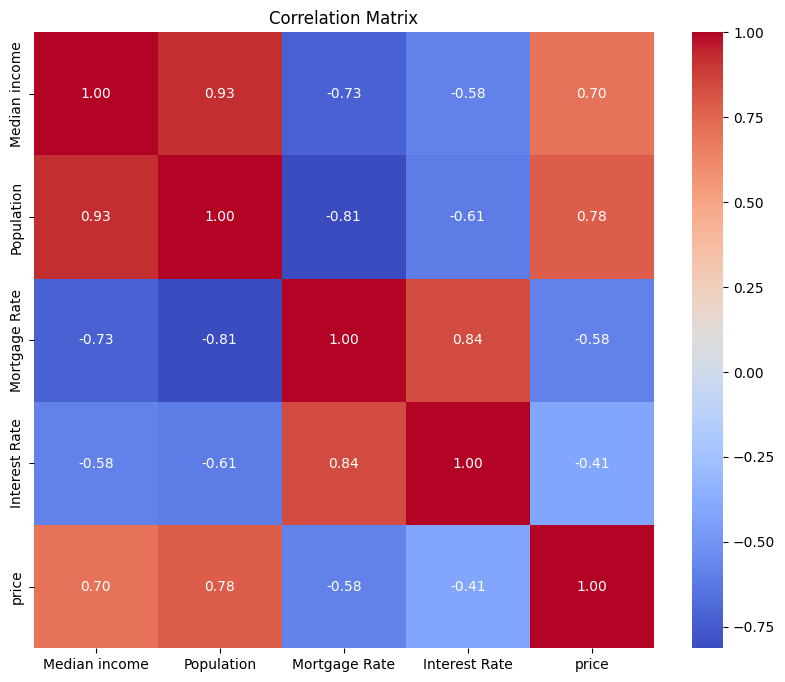

In [144]:
# Filter only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix only for numeric columns
corr_matrix = numeric_columns.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



### Training the model

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Split the data into training and testing sets (80% training, 20% testing)
X = df[['Median income', 'Population', 'Mortgage Rate']]  # Make sure these columns exist in your DataFrame
y = df['price_category']

# Encode the target variable 'price_category' to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Add a constant to the model for the intercept term
X_train = sm.add_constant(X_train)

# Fit the multinomial logistic regression model with the training data
logit_model = sm.MNLogit(y_train, X_train)
result = logit_model.fit()

# Display the model summary
print(result.summary())

# If you want to make predictions on the test data, you can do it like this:
X_test = sm.add_constant(X_test)
predictions = result.predict(X_test)






Optimization terminated successfully.
         Current function value: 0.108221
         Iterations 14
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  836
Model:                        MNLogit   Df Residuals:                      824
Method:                           MLE   Df Model:                            9
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.5071
Time:                        01:05:23   Log-Likelihood:                -90.473
converged:                       True   LL-Null:                       -183.57
Covariance Type:            nonrobust   LLR p-value:                 2.573e-35
          y=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           100.8760     80.773      1.249      0.212     -57.437     259.188
Median income     0

AUC: 0.9566402542198011


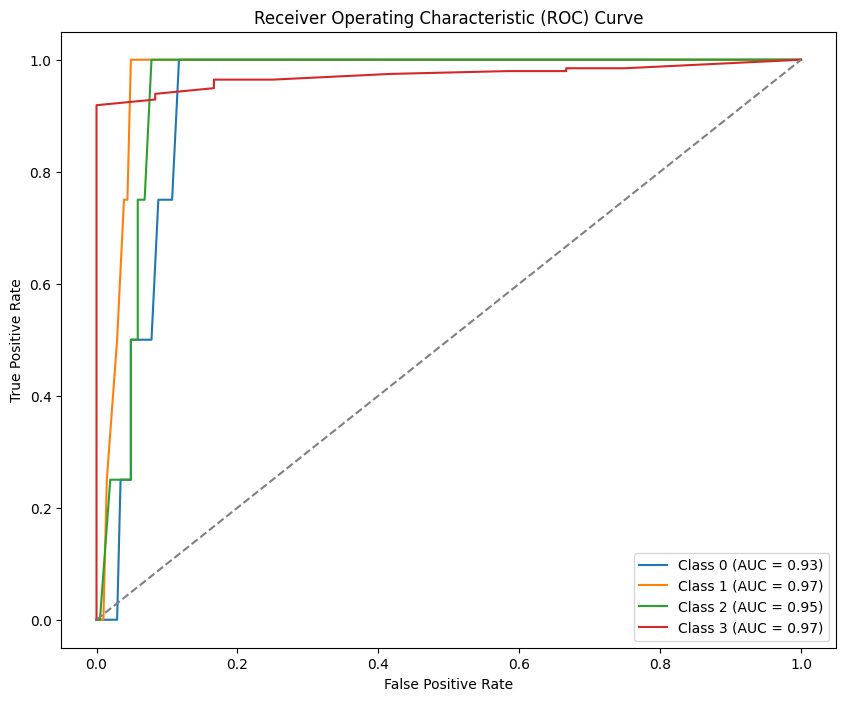

In [179]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Make probability predictions for each class using the test data
y_pred_prob = result.predict(X_test)

# Convert y_pred_prob to a NumPy array if it's a DataFrame
y_pred_prob = np.array(y_pred_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f"AUC: {auc}")

# Plot the ROC curve for each class
n_classes = len(le.classes_)  # Number of unique classes

# Create the plot
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])  # Get false positive rate and true positive rate for each class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_test == i, y_pred_prob[:, i]):.2f})')

# Plot a diagonal line representing a random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()




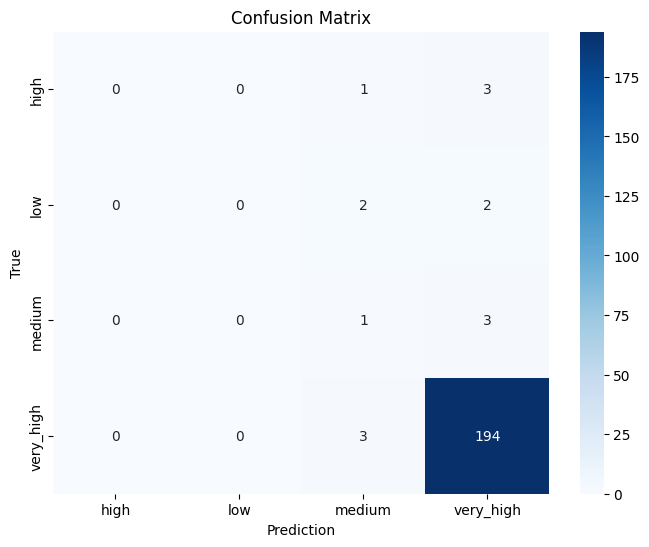

In [180]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Make probability predictions for each class using the test data
y_pred_prob = result.predict(X_test)  # Probability predictions for each class

# For multiclass classification, select the class with the highest probability
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()




In [174]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy using the true labels and the predictions on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




Accuracy: 0.9330143540669856


In [181]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for each class using the test data
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



Precision: 0.9079877912603291
Recall: 0.9330143540669856
F1-score: 0.9200774881963498


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
